# Fourier 2D Filtros<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# 2D Fourier Transform

References:

* [Image denoising by FFT](https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html) by Scipy lecture notes

* [Digital Image Processing using Fourier Transform in Python](https://hicraigchen.medium.com/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82) by Craig Chen

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift
from   scipy.ndimage     import gaussian_filter
from   scipy.signal      import fftconvolve

# Images used in our examples

In [ ]:
!wget https://www.dropbox.com/s/jwx2hxxy45n9q7l/chess_0.png
!wget https://www.dropbox.com/s/tdeamv6dsgms6dh/chess_1.jpg
!wget https://www.dropbox.com/s/5zh79thjq6ttauv/chiloe.png
!wget https://www.dropbox.com/s/ugfig50wcs56fiz/moonlanding.png
!wget https://www.dropbox.com/s/qtbgxpk4ty88yrk/barbara.tiff
!wget https://www.dropbox.com/s/u2g7j02lvlknw38/elephant.png

# Basic Functions



## Read the input image

In [ ]:
#X = cv2.imread("chess_1.jpg", 0)
X = cv2.imread("chiloe.png", 0)
#X = cv2.imread('chess_0.png',0)


## Visualization functions

In [ ]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[1]), np.arange(matrix.shape[0]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

def plot_spectrum(X_ft,centered=True):
    # A logarithmic colormap
    if centered:
      X_ftc = fftshift(X_ft)
    else:
      X_ftc = X_ft
    plt.imshow(np.abs(X_ftc), norm=LogNorm(vmin=5))
    plt.colorbar()


## Direct transform: fftshift, inverse

original > Fourier > original (with no filtering)

In [ ]:
# Original images is transformed (direct and inverse)

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(X, "gray"), plt.title("Original Imagen")

X_ft = fft2(X)
plt.subplot(234), plt.imshow(np.log(1+np.abs(X_ft)), "gray"), plt.title("Spectrum")

X_ftc = fftshift(X_ft)
plt.subplot(235), plt.imshow(np.log(1+np.abs(X_ftc)), "gray"), plt.title("Centered Spectrum")

X_ft_inv = ifftshift(X_ftc)
plt.subplot(236), plt.imshow(np.log(1+np.abs(X_ft_inv)), "gray"), plt.title("Non-centered Spectrun")

X_new = ifft2(X_ft_inv)
plt.subplot(233), plt.imshow(np.abs(X_new), "gray"), plt.title("Processsed Image = Original Image")

plt.show()

## Color Representation

In [ ]:
plt.figure(figsize=(20,10))
plot_spectrum(X_ft)
plt.title('Centered Spectrum')
plt.show()

## Module and Phase of Spectrum

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121), plt.imshow(np.log(np.abs(X_ft)), "gray"), plt.title("Module")

plt.subplot(122), plt.imshow(np.angle(X_ft), "gray"), plt.title("Phase")
plt.show()

# Filter deifinition in Frequency Domain

(low pass filters)

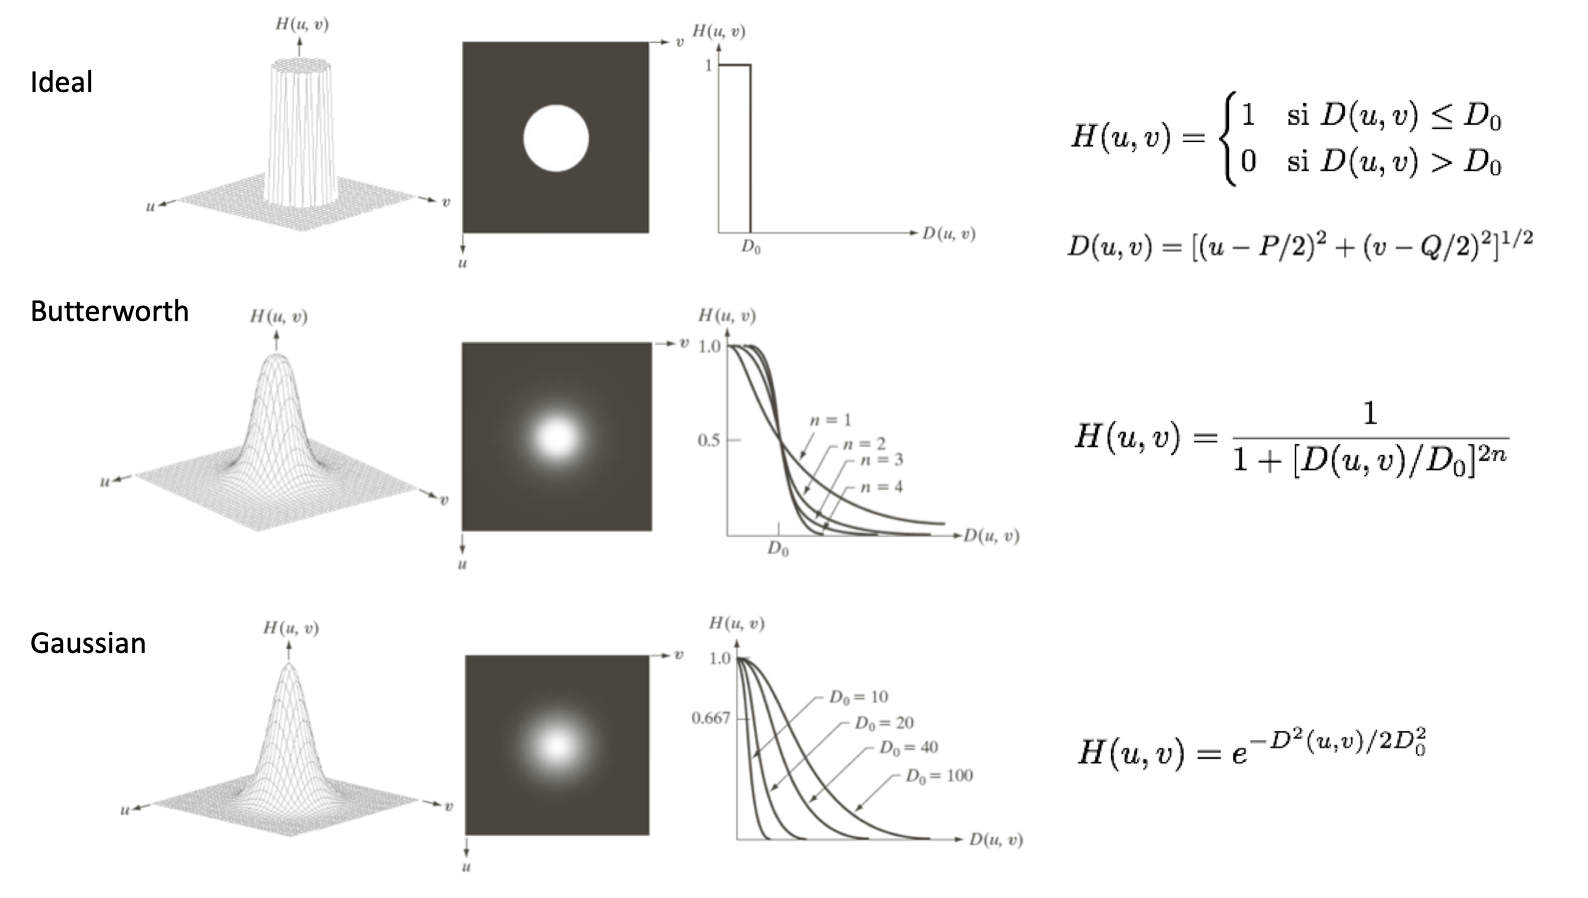

... High pass filtering corresponds to  $1-H(u,v)$

## Stop frequency

In [ ]:
Do = 50

## Filtering Functions

In [ ]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base





### Ideal Filter

In [ ]:
plt.figure(figsize=(30,15))

LowPass = idealFilterLP(Do,X.shape)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(Do,X.shape)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")
surface_plot(LowPass, cmap=plt.cm.coolwarm)

plt.show()

### Butterworth Filter

In [ ]:
plt.figure(figsize=(30,15))

n = 1 # order of Butterworth filter

LowPass = butterworthLP(Do,X.shape,n)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(Do,X.shape,n)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")
surface_plot(LowPass, cmap=plt.cm.coolwarm)

plt.show()

### Gaussiano Filter

In [ ]:
plt.figure(figsize=(30,15))

LowPass = butterworthLP(Do,X.shape,3)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(Do,X.shape,3)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")
surface_plot(LowPass, cmap=plt.cm.coolwarm)

plt.show()

In [ ]:
plt.figure(figsize=(30,15))

LowPass = gaussianLP(Do,X.shape)
plt.subplot(121), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(Do,X.shape)
plt.subplot(122), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")
surface_plot(LowPass, cmap=plt.cm.coolwarm)

plt.show()

In [ ]:
plt.figure(figsize=(30,15))

IdealLP = idealFilterLP(Do,X.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(Do,X.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(Do,X.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(30,15))
IdealHP = idealFilterHP(Do,X.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(Do,X.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(Do,X.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

## EXamples with Filters

### Ideal, Butterworth, Gaussian Filtering

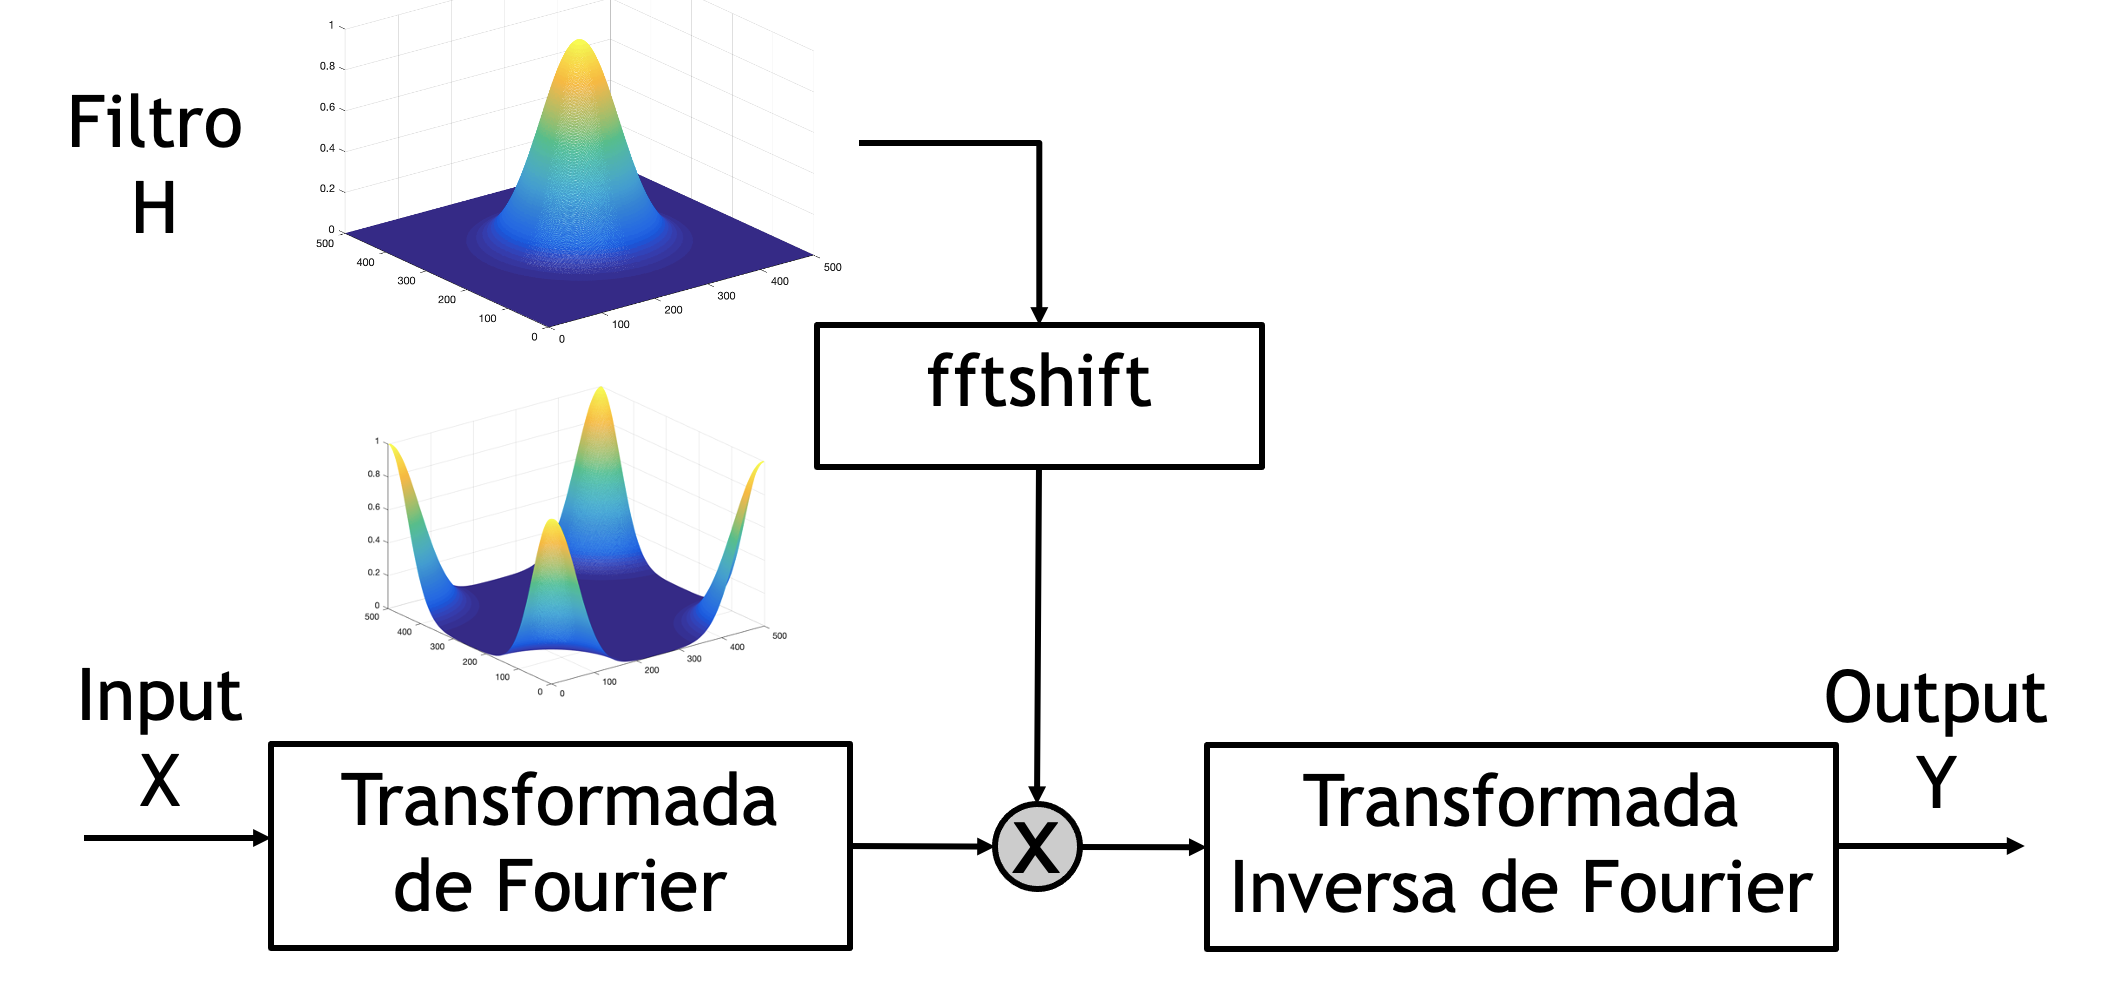

In [ ]:
lp     = 2  # 1: low pass 2: high pass
filtro = 3  # 1: ideal, 2: butterworth, 3: gaussian
Do     = 30 # stop frequency
n      = 2  # Butterworth orther

if filtro == 1:
  H = idealFilterLP(Do,X.shape)
  print('Ideal')
elif filtro == 2:
  n = 4
  H = butterworthLP(Do,X.shape,n)
  print('Butterworth')
elif filtro == 3:
  H = gaussianLP(Do,X.shape)
  print('Gaussian')

if lp==2:
  H = 1-H
  print('high pass')

plt.figure(figsize=(30,15))

plt.subplot(231), plt.imshow(X, "gray"), plt.title("Original Image")

X_ft = fft2(X)
plt.subplot(232), plt.imshow(np.log(1+np.abs(X_ft)), "gray"), plt.title("Spectrum")


plt.subplot(233), plt.imshow(H, "gray"), plt.title("H")

H_c = fftshift(H)
plt.subplot(234), plt.imshow(H_c, "gray"), plt.title("fftshift(H)")

Y_ft = X_ft * H_c
plt.subplot(235), plt.imshow(np.log(1+np.abs(Y_ft)), "gray"), plt.title("Filtered Spectrum")

X_new = ifft2(Y_ft)
plt.subplot(236), plt.imshow(np.abs(X_new), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
Do     = 20 # stop frequency

plt.figure(figsize=(30,15))

img = X
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(Do,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
Do     = 20 # stop frequency

img = X
original = fft2(img)
center = fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(Do,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(Do,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
Do     = 20 # stop frequency

img = X
original = fft2(img)
center = fftshift(original)

plt.figure(figsize=(30,15))

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(Do,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

In [ ]:
Do     = 40 # stip frequency

img = X
original = fft2(img)
center = fftshift(original)

plt.figure(figsize=(40,20))

LowPassCenter = center * idealFilterLP(Do,img.shape)
LowPass = ifftshift(LowPassCenter)
inverse_LowPass = ifft2(LowPass)
plt.subplot(311), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(Do,img.shape,n)
LowPass = ifftshift(LowPassCenter)
inverse_LowPass = ifft2(LowPass)
plt.subplot(312), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n="+str(n)+")")

LowPassCenter = center * gaussianLP(Do,img.shape)
LowPass = ifftshift(LowPassCenter)
inverse_LowPass = ifft2(LowPass)
plt.subplot(313), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

In [ ]:
img = X
original = fft2(img)
center = fftshift(original)
Do = 20
th = 20
plt.figure(figsize=(40,20))

HighPassCenter = center * idealFilterHP(Do,img.shape)
HighPass = ifftshift(HighPassCenter)
inverse_HighPass = ifft2(HighPass)
plt.subplot(311), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(Do,img.shape,10)
HighPass = ifftshift(HighPassCenter)
inverse_HighPass = ifft2(HighPass)
plt.subplot(312), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Butterworth High Pass ("+str(n)+")")

HighPassCenter = center * gaussianHP(Do,img.shape)
HighPass = ifftshift(HighPassCenter)
inverse_HighPass = ifft2(HighPass)
plt.subplot(313), plt.imshow(np.abs(inverse_HighPass)>th, "gray"), plt.title("Gaussian High Pass")

plt.show()

In [ ]:
Do     = 50 # frecuencia de corte

img = X
original = fft2(img)
center = fftshift(original)

plt.figure(figsize=(30,15))

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(Do,img.shape)
LowPass = ifftshift(LowPassCenter)
inverse_LowPass = ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(Do,img.shape)
HighPass = ifftshift(HighPassCenter)
inverse_HighPass = ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

### Noise reduction

In [ ]:
X = cv2.imread('moonlanding.png',0)/255.0
plt.figure(figsize=(20,10))
plt.imshow(X, plt.cm.gray)
plt.title('Imagen original')
plt.show()

In [ ]:
X_ft = fft2(X)
X_ftc = fftshift(X_ft)

plt.figure(figsize=(20,10))
plot_spectrum(X_ft)
plt.title('Espectro centrado')
plt.show()

In [ ]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
X_ft2 = X_ft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = X_ft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
X_ft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
X_ft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure(figsize=(20,10))
plot_spectrum(X_ft2)
plt.title('Espectro filtrado')
plt.show()

In [ ]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
Y = ifft2(X_ft2).real

plt.figure(figsize=(20,10))
plt.imshow(Y, plt.cm.gray)
plt.title('Imagen filtrada')
plt.show()

In [ ]:
Y = gaussian_filter(X,3)

Y_ft = fft2(Y)


plt.figure(figsize=(20,10))
plot_spectrum(X_ft)
plt.title('Espectro original')
plt.show()

plt.figure(figsize=(20,10))
plot_spectrum(Y_ft)
plt.title('Espectro filtrado')
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(Y, plt.cm.gray)
plt.title('Imagen filtrada')

plt.show()

### Anti-aliasing Filtering

It is important to remember that the anti-aliasing filter is a low-pass filter that is used BEFORE sampling the image to remove the high frequencies of the original image. In this way, the sampled image respects the Nyquist theorem, that is to sample the image at least twice the maximum frequency of the (new) image.

In [ ]:
X = cv2.imread('barbara.tiff',0)
plt.figure(figsize=(30,15))
plt.imshow(X,cmap='gray')
plt.title("Imagen original")
plt.show()

In [ ]:
# Subsampling
def subsampling(X,s):
  (N,M) = X.shape
  N2 = int(N/s)
  M2 = int(M/s)

  Y = np.zeros((N2,M2))
  for i2 in range(N2):
    i = int(i2*s)
    for j2 in range(M2):
      j = int(j2*s)
      Y[i2,j2] = X[i,j]
  return Y


In [ ]:
# Subsampling without anti-aliasing filtering

m = 2 # subsampling each m pixels
Y = subsampling(X,m)

plt.figure(figsize=(40,20))


plt.subplot(211),plt.imshow(np.abs(X), "gray"), plt.title("Original Image")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Subsampled Image")

plt.show()




In [ ]:
X_ft = fft2(X)
X_ftc = fftshift(X_ft)

Do = 50

plt.figure(figsize=(40,20))


Yo_ftc = X_ftc * gaussianLP(Do,X.shape)
Yo_ft = ifftshift(Yo_ftc)
Yo = ifft2(Yo_ft).real

Y  = subsampling(Yo,m)

plt.subplot(211),plt.imshow(np.abs(Yo), "gray"), plt.title("Filtered Image")
plt.subplot(212),plt.imshow(np.abs(Y), "gray"), plt.title("Filtered Image and subsampled")

plt.show()




# Filter design in Space Domain

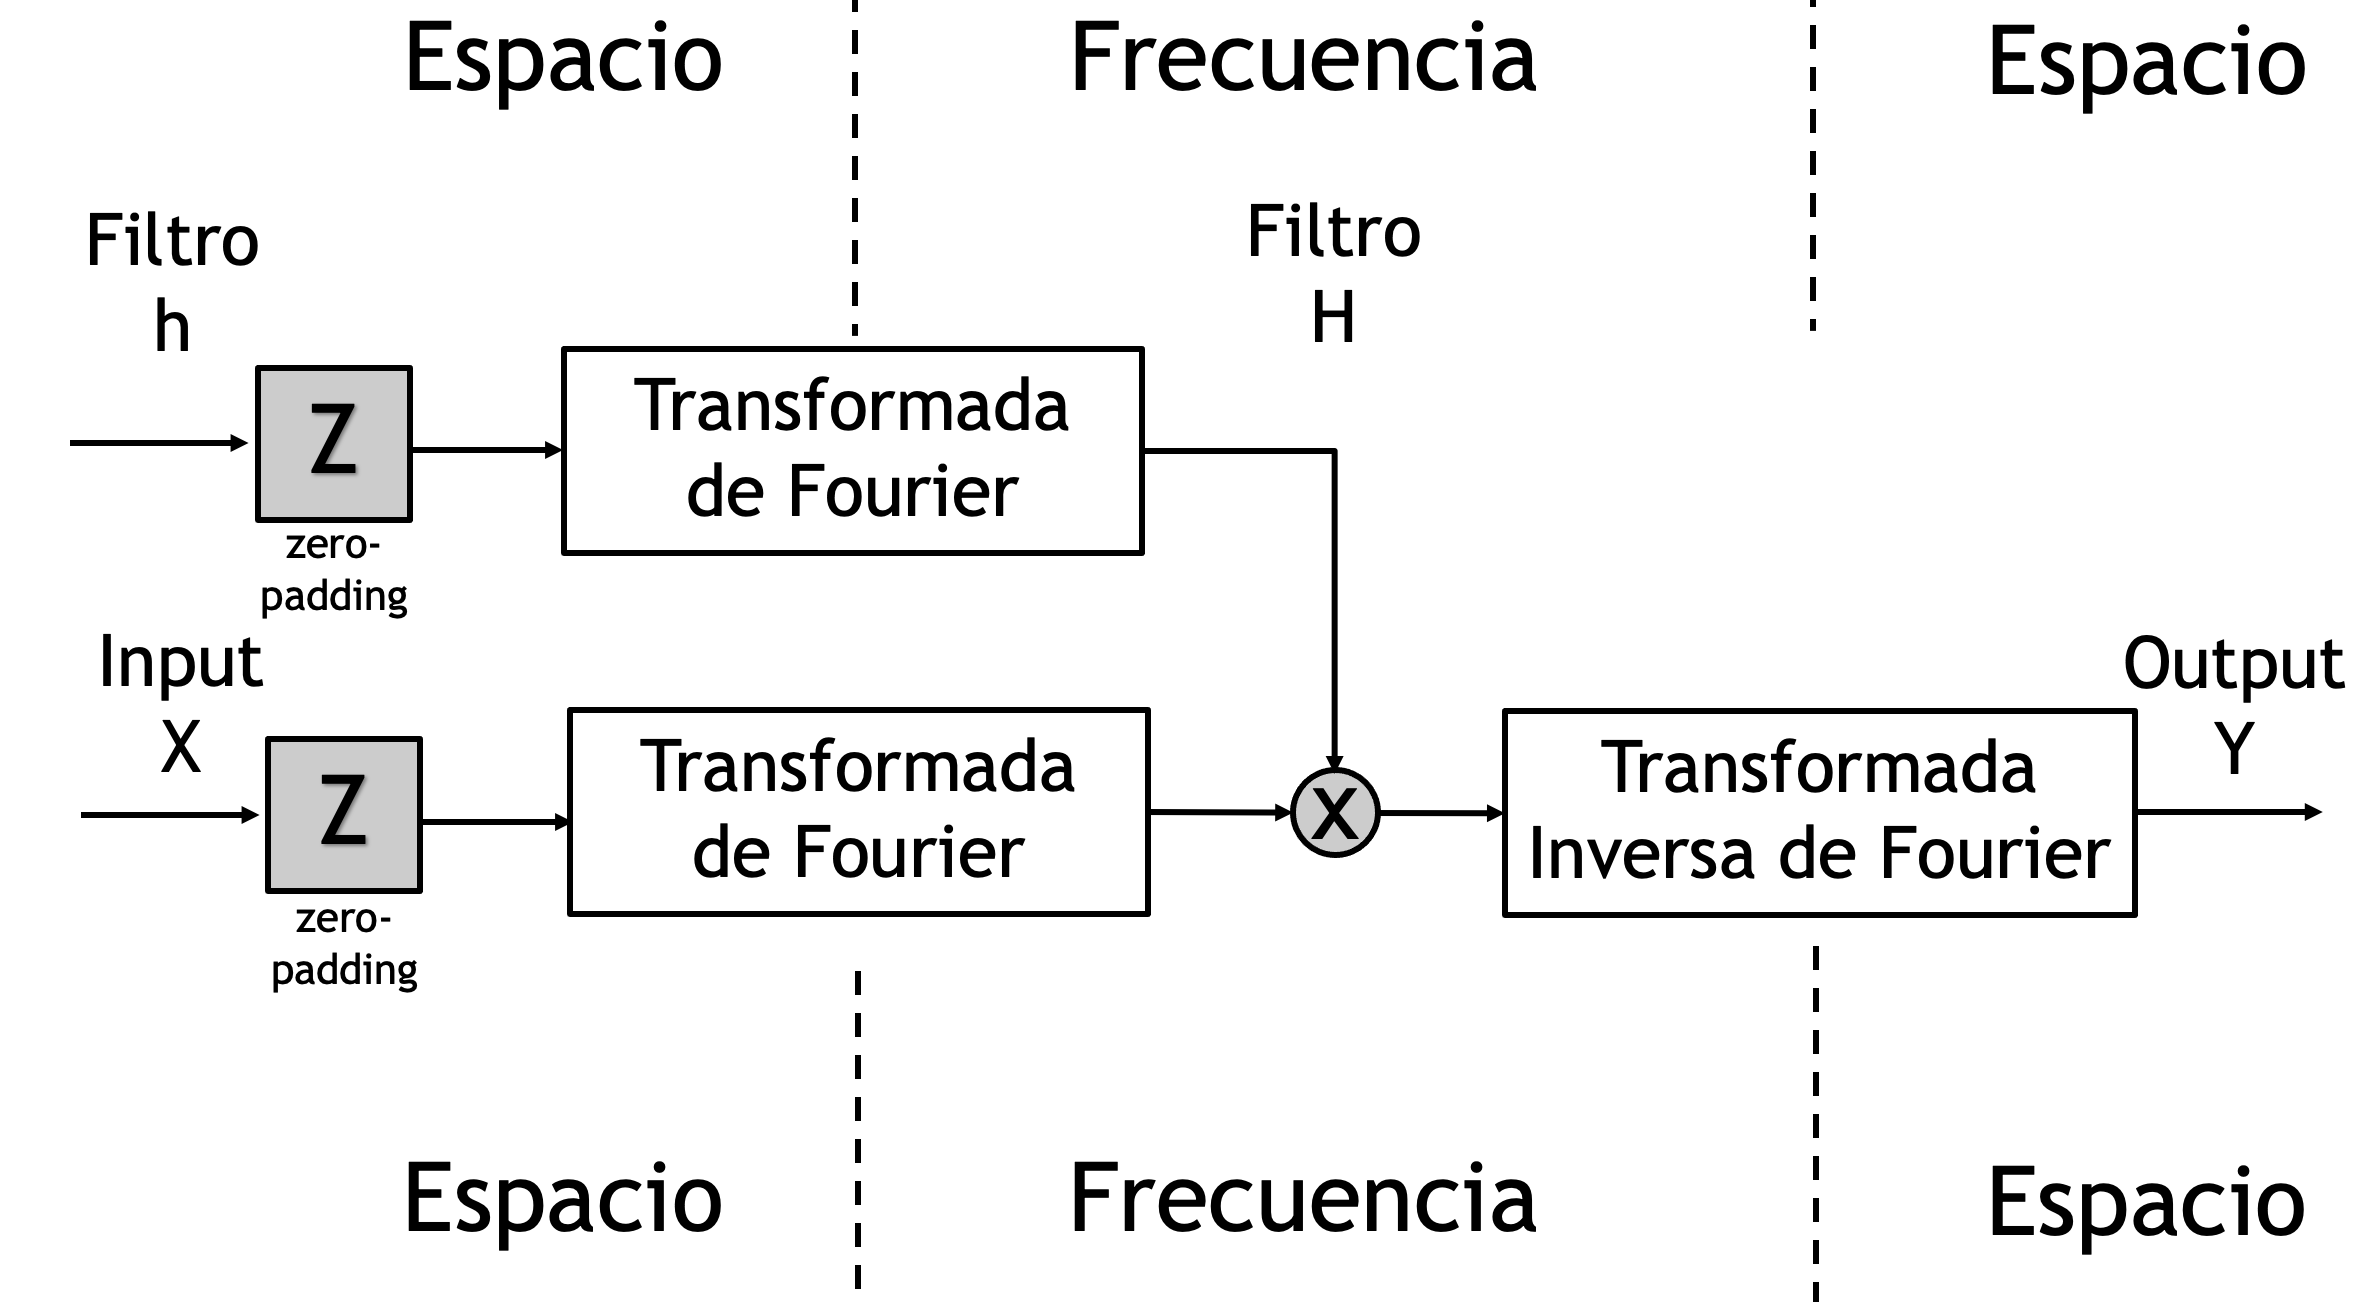

In [ ]:
# read image
X = cv2.imread('elephant.png', 0)/255.0
plt.figure()
plt.imshow(X,cmap='gray')
plt.show()

## Filter definition in space domain

In [ ]:
# First a 1-D  Gaussian
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
h = bump[:, np.newaxis] * bump[np.newaxis, :]

print(h.shape)

(fig, ax, surf) = surface_plot(h, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')
plt.show()

## Implementation with zero-padding

In [ ]:
A = X.shape[0]
B = X.shape[1]
C = h.shape[0]
D = h.shape[1]
P = A+C-1
Q = B+D-1

h_ft = fft2(h, shape=(P,Q), axes=(0, 1))

# convolve
X_ft  = fft2(X, shape=(P,Q), axes=(0, 1))
X2_ft = h_ft * X_ft
Yo    = ifft2(X2_ft, axes=(0, 1)).real

# clip values to range
a = int(C/2)-1
b = int(D/2)-1
Y = np.clip(Yo[a:a+A,b:b+B], 0, 1)

# plot output
plt.figure()
plt.imshow(Y,cmap='gray')
plt.show()

## Implementation with fftconvolve

In [ ]:
# The same result is obtained with fftconvolve
# Note that X and h are in the domain of space.
# The function performs the zero-paddings, the Fourier transforms, the multiplication of the spectra
# and the inverse transform
Y = fftconvolve(X,h, mode='same')
plt.figure()
plt.imshow(Y,cmap='gray')
print(Y.shape)
plt.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).